In [ ]:
# 1. Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tweepy
from tweepy import OAuthHandler

In [ ]:
# 2.Set Connecion

#Get from developers.twitter.com/App->Setting->keys&tokens
#Just assign the credentials

consumer_key = "YCyZzlGlH4bVcgu9DEtXGGCtb"
consumer_secret = "zBH1Yus7hpCE7R1P9oRTqu7fHXzSKRzWNfGQRLQ3qA3HsuH3V5"
access_token = "1406151650465648640-HNSctNOHvpkYIiwNaUnIwCL6uhpycN"
access_token_secret = "fuR5lHVZKOdNB1Qn9A2awjzSuqtptFLwHu5muErvzH5gI"



# Use the above credentials to authenticate the API.

auth = tweepy.OAuthHandler( consumer_key , consumer_secret )
#auth.access_token_secret
auth.set_access_token( access_token , access_token_secret )

api = tweepy.API(auth)

In [ ]:
df = pd.DataFrame(columns=["Date","User","IsVerified","Tweet","Likes","RT",'User_location'])
print(df)

Empty DataFrame
Columns: [Date, User, IsVerified, Tweet, Likes, RT, User_location]
Index: []


In [ ]:
## We will use api as api.search inside this tweepy cursor.
# 4.Write a Function to extract tweets:

# We will Use **tweepy.cursor()** because we want to extract a larger number of tweets i.e over 100,500 etc


def get_tweets(Topic,Count):    
    i=0
    for tweet in tweepy.Cursor(api.search, q=Topic,count=100, lang="en",exclude='retweets').items():
        print(i, end='\r')
        df.loc[i,"Date"] = tweet.created_at
        df.loc[i,"User"] = tweet.user.name
        df.loc[i,"IsVerified"] = tweet.user.verified
        df.loc[i,"Tweet"] = tweet.text
        df.loc[i,"Likes"] = tweet.favorite_count
        df.loc[i,"RT"] = tweet.retweet_count
        df.loc[i,"User_location"] = tweet.user.location
        #df.to_csv("TweetDataset.csv",index=False)
        df.to_excel('{}.xlsx'.format("TweetDataset"),index=False)   ## Save as Excel
        i=i+1
        if i>Count:
            break
        else:
            pass
        

In [ ]:
Topic=["Grofers"]
get_tweets(Topic , Count=1000)

In [ ]:
df.head(1000)

,Date,User,IsVerified,Tweet,Likes,RT,User_location
0,2021-11-26 13:15:32,Navin Tyagi,False,@rupin1992 @arunbothra @RoflGandhi_ @Cryptic_M...,0,0,India
1,2021-11-26 12:17:16,Mahesh,False,Loll.. @Grofers is this 10minute delivery ?? 😳...,0,0,Alampur
2,2021-11-26 12:17:02,Rakesh punmia,False,@thefbai @salloni @anchor @Spotify @spotifyind...,0,0,"Chennai, India"
3,2021-11-26 12:06:13,Dr. Sisir kumar patra,False,@Grofers Very upset and disguising C Care repl...,0,0,Mumbai
4,2021-11-26 12:04:03,Rummyskitchen,False,@thefbai @salloni @anchor @Spotify @spotifyind...,2,1,Mumbai
...,...,...,...,...,...,...,...
878,2021-11-18 02:36:40,Tarun jain,False,@dhanicares Amount has been deducted from dhan...,0,0,Rajasthan
879,2021-11-18 01:50:58,Real Estate Daily,False,E-commerce firm Grofers plans to open 150 more...,0,0,Asia Pacific
880,2021-11-18 01:28:41,Anish Nanda,False,Zomato may invest $500 million in Grofers to p...,0,0,"Mumbai, India"
881,2021-11-18 01:01:30,grofers,True,"@ANKITISLUCKY Hi Ankit, we're sorry you feel t...",0,0,India


In [ ]:
# Function to Clean the Tweet.

import re
def clean_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([RT])', ' ', str(tweet).lower()).split())

# We only want the Text so :

# (@[A-Za-z0-9]+)   : Delete Anything like @hello @Letsupgrade etc
# ([^0-9A-Za-z \t]) : Delete everything other than text,number,space,tabspace
# (\w+:\/\/\S+)     : Delete https://
# ([RT]) : Remove "RT" from the tweet

In [ ]:
# Funciton to analyze Sentiment

from textblob import TextBlob
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'


In [ ]:
#Function to Pre-process data for Worlcloud:here we are removing the words present in Topic from the Corpus so they dont come in WordCloud.
# Ex : Topic is "Arsenal vs United", we want to remove "Arsenal" "vs" "United" from the WordCloud.

def prepCloud(Topic_text,Topic):
    Topic = str(Topic).lower()
    Topic=' '.join(re.sub('([^0-9A-Za-z \t])', ' ', Topic).split())
    Topic = re.split("\s+",str(Topic))
    stopwords = set(STOPWORDS)
    stopwords.update(Topic) ### Add our topic in Stopwords, so it doesnt appear in wordClous
    ###
    text_new = " ".join([txt for txt in Topic_text.split() if txt not in stopwords])
    return text_new


In [ ]:
# Call function to get Clean tweets

df['clean_tweet'] = df['Tweet'].apply(lambda x : clean_tweet(x))
df.head(1000)

,Date,User,IsVerified,Tweet,Likes,RT,User_location,clean_tweet
0,2021-11-26 13:15:32,Navin Tyagi,False,@rupin1992 @arunbothra @RoflGandhi_ @Cryptic_M...,0,0,India,miind atleast zee is showing correct price and...
1,2021-11-26 12:17:16,Mahesh,False,Loll.. @Grofers is this 10minute delivery ?? 😳...,0,0,Alampur,loll is this 10minute delivery hyderabad area ...
2,2021-11-26 12:17:02,Rakesh punmia,False,@thefbai @salloni @anchor @Spotify @spotifyind...,0,0,"Chennai, India",
3,2021-11-26 12:06:13,Dr. Sisir kumar patra,False,@Grofers Very upset and disguising C Care repl...,0,0,Mumbai,very upset and disguising c care reply from gr...
4,2021-11-26 12:04:03,Rummyskitchen,False,@thefbai @salloni @anchor @Spotify @spotifyind...,2,1,Mumbai,
...,...,...,...,...,...,...,...,...
878,2021-11-18 02:36:40,Tarun jain,False,@dhanicares Amount has been deducted from dhan...,0,0,Rajasthan,amount has been deducted from dhani wallet but...
879,2021-11-18 01:50:58,Real Estate Daily,False,E-commerce firm Grofers plans to open 150 more...,0,0,Asia Pacific,e commerce firm grofers plans to open 150 more...
880,2021-11-18 01:28:41,Anish Nanda,False,Zomato may invest $500 million in Grofers to p...,0,0,"Mumbai, India",zomato may invest 500 million in grofers to pu...
881,2021-11-18 01:01:30,grofers,True,"@ANKITISLUCKY Hi Ankit, we're sorry you feel t...",0,0,India,hi ankit we re sorry you feel this way the sur...


In [ ]:
# Call function to get the Sentiments

df["Sentiment"] = df["Tweet"].apply(lambda x : analyze_sentiment(x))
df.head(1000)

,Date,User,IsVerified,Tweet,Likes,RT,User_location,clean_tweet,Sentiment
0,2021-11-26 13:15:32,Navin Tyagi,False,@rupin1992 @arunbothra @RoflGandhi_ @Cryptic_M...,0,0,India,miind atleast zee is showing correct price and...,Neutral
1,2021-11-26 12:17:16,Mahesh,False,Loll.. @Grofers is this 10minute delivery ?? 😳...,0,0,Alampur,loll is this 10minute delivery hyderabad area ...,Neutral
2,2021-11-26 12:17:02,Rakesh punmia,False,@thefbai @salloni @anchor @Spotify @spotifyind...,0,0,"Chennai, India",,Neutral
3,2021-11-26 12:06:13,Dr. Sisir kumar patra,False,@Grofers Very upset and disguising C Care repl...,0,0,Mumbai,very upset and disguising c care reply from gr...,Positive
4,2021-11-26 12:04:03,Rummyskitchen,False,@thefbai @salloni @anchor @Spotify @spotifyind...,2,1,Mumbai,,Neutral
...,...,...,...,...,...,...,...,...,...
878,2021-11-18 02:36:40,Tarun jain,False,@dhanicares Amount has been deducted from dhan...,0,0,Rajasthan,amount has been deducted from dhani wallet but...,Neutral
879,2021-11-18 01:50:58,Real Estate Daily,False,E-commerce firm Grofers plans to open 150 more...,0,0,Asia Pacific,e commerce firm grofers plans to open 150 more...,Positive
880,2021-11-18 01:28:41,Anish Nanda,False,Zomato may invest $500 million in Grofers to p...,0,0,"Mumbai, India",zomato may invest 500 million in grofers to pu...,Positive
881,2021-11-18 01:01:30,grofers,True,"@ANKITISLUCKY Hi Ankit, we're sorry you feel t...",0,0,India,hi ankit we re sorry you feel this way the sur...,Negative


In [ ]:
# Check Summary of Random Record
n = 1
print("Original tweet:\n",df['Tweet'][n])
print()
print("Clean tweet:\n",df['clean_tweet'][n])
print()
print("Sentiment of the tweet:\n",df['Sentiment'][n])

Original tweet:
 Loll.. @Grofers is this 10minute delivery ?? 😳😳 Hyderabad area, pincode 500044 https://t.co/9Ud8k1L5IU

Clean tweet:
 loll is this 10minute delivery hyderabad area pincode 500044

Sentiment of the tweet:
 Neutral


In [ ]:
# Overall Summary

print("Total Tweets Extracted for Topic : {} are : {}".format(Topic,len(df.Tweet)))
print("Total Positive Tweets are : {}".format(len(df[df["Sentiment"]=="Positive"])))
print("Total Negative Tweets are : {}".format(len(df[df["Sentiment"]=="Negative"])))
print("Total Neutral Tweets are : {}".format(len(df[df["Sentiment"]=="Neutral"])))

Total Tweets Extracted for Topic : ['Grofers'] are : 883
Total Positive Tweets are : 285
Total Negative Tweets are : 204
Total Neutral Tweets are : 394


In [ ]:
df["Sentiment"].value_counts()

Neutral     394
Positive    285
Negative    204
Name: Sentiment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Summary of Counts for Total tweets')

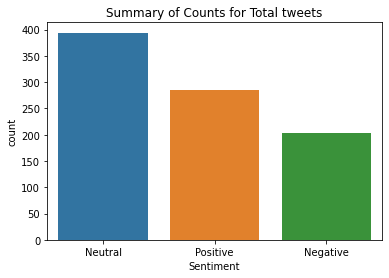

In [ ]:
#sns.countplot(df["Sentiment"],facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))
sns.countplot(df["Sentiment"])
plt.title("Summary of Counts for Total tweets")

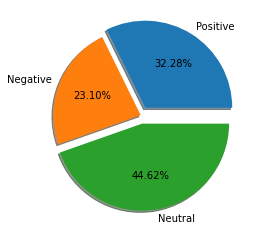

In [ ]:
# Piechart 
#string, used to label the wedges with their numeric value. The label will be placed inside the wedge. The format string will be fmt%pct.

a=len(df[df["Sentiment"]=="Positive"])
b=len(df[df["Sentiment"]=="Negative"])
c=len(df[df["Sentiment"]=="Neutral"])
d=np.array([a,b,c])
explode = (0.1, 0.0, 0.1)
plt.pie(d,shadow=True,explode=explode,labels=["Positive","Negative","Neutral"],autopct='%1.2f%%');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Summary of Counts for Total tweets,Distributed by if the User has a verified Account or not')

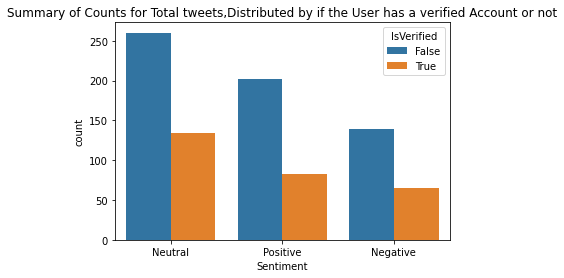

In [ ]:
sns.countplot(df["Sentiment"],hue=df.IsVerified)
plt.title("Summary of Counts for Total tweets,Distributed by if the User has a verified Account or not")

In [ ]:
p_location.head(50)

0                       Mumbai
1                        Delhi
2              Bengaluru North
3     Maharani Bagh, New Delhi
4                          NaN
5                          NaN
6                          NaN
7                        India
8                    Bangalore
9             New Delhi, India
10                       India
11              गुड़गांव, भारत
12                       India
13                      Bombay
14                     Roorkee
15                     Roorkee
16                   Bangalore
17              Jodhpur, India
18                       India
19             The Internet 🌏 
20                       India
21                         NaN
22    Gurgaon/Bengaluru, India
23                   HYDERABAD
24                         NaN
25                     Kolkata
26                         NaN
27                   New Delhi
28                       India
29                         NaN
30                       India
31            New Delhi, India
32      

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

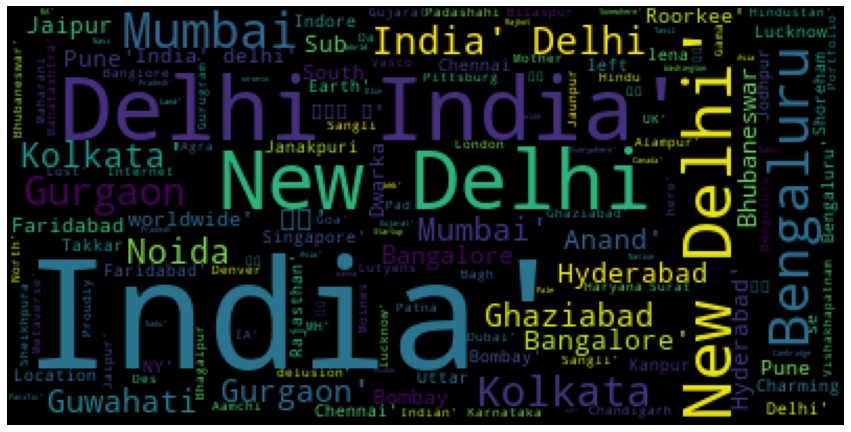

In [ ]:
# WordCloud of all the locations of tweets
text = df['User_location'].values 

wordcloud = WordCloud().generate(str(text))
plt.figure(figsize=(15,10))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

There are 74146 words in the combination of all review.


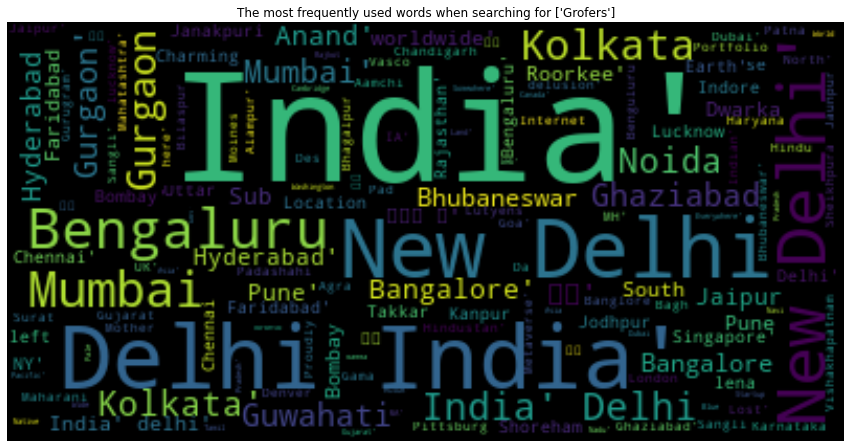

In [ ]:
# Combine all Positive reviews into one big text and create a Cloud to see which Words are most common in these Tweets.

text = " ".join(review for review in df.clean_tweet)
print ("There are {} words in the combination of all review.".format(len(text)))


# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["drink", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords

text_newALL = prepCloud(text,Topic)


# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_newALL)

# Display the generated image:
# the matplotlib way:
text = df['User_location'].values 
#new_d = pd.DataFrame(text)
p_location = df.loc[df['Sentiment'] == "Positive", 'User_location']

wordcloud = WordCloud().generate(str(text))


plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most frequently used words when searching for {}".format(Topic),)
plt.axis("off")
plt.show()

In [ ]:
#Locations of Positive tweets
p_location.head(10)

3                       Mumbai
13                       Delhi
16             Bengaluru North
22    Maharani Bagh, New Delhi
26                            
29                            
30                            
32                       India
36                   Bangalore
41            New Delhi, India
Name: User_location, dtype: object

In [ ]:
#assigning NAN to the empty cells from location earlier which are of neutral and negative tweets 
p_location.replace('', np.nan, inplace=True)

In [ ]:
# removing the NAN cells
Locations_of_all_the_positive_tweets = p_location.dropna()

In [ ]:
# locations of all the Positive tweets
Locations_of_all_the_positive_tweets.head(26)

3                        Mumbai
13                        Delhi
16              Bengaluru North
22     Maharani Bagh, New Delhi
32                        India
36                    Bangalore
41             New Delhi, India
43                        India
48               गुड़गांव, भारत
49                        India
53                       Bombay
54                      Roorkee
56                      Roorkee
57                    Bangalore
58               Jodhpur, India
59                        India
69              The Internet 🌏 
73                        India
80     Gurgaon/Bengaluru, India
82                    HYDERABAD
84                      Kolkata
86                    New Delhi
88                        India
90                        India
100            New Delhi, India
102                      Sangli
Name: User_location, dtype: object

In [ ]:
#generating the csv file for the locations of positive tweets
Locations_of_all_the_positive_tweets.to_csv("location_data.csv")